# DAV 6150 Module 8 Assignment - Classification via KNN & SVM
Brian Livian, Alejandra Zapata, Ke Chen

## 1. Introduction 
The data set from Federal Reserve Bank of Boston regarding the mortgage loan approval will be used for analyzing if model generating. There are totally 13 variables in the data set. 12 will be used as explanatory variables and 1 will be used as response variable. According to the introduction of data set from https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html, the explanatory variables are:
- dir: indicating the applicant's debt payments to total income ratio.
- hir: indicating the applicant's housing expenses to income ratio.
- lvr: indicating the applicant's ratio of size of loan to assessed value of property.
- ccs: consumer credit score from 1 to 6 (a low value being a good score).
- mcs: mortgage credit score from 1 to 4 (a low value being a good score).
- pbcr: if the applicant had public bad credit record.
- dmi: if the applicant had denied mortgage insurance.
- self: if the applicant was self-employed.
- single: if the applicant is single.
- uria: 1989 Massachusetts unemployment rate in the applicant's industry.
- condominium: if the unit a condominium. (Original data use column name condominiom)
- black: is the applicant black?

The response variable is: 
- deny: if mortgage application denied.

The planned steps will be addressed below:

- 1. Perform exploratory data analysis and general overview of the data set.
- 2. Deal with the missing values and outliers, have data transformation if needed.
- 3. Based on the EDA results, select/combine the features to reduce the numbers of the explanatory variables of the regression model in 3 different ways.
- 4. Applying the reduced features to perform KNN modeling and SVM modeling, the performance of the model will be evaluated by cross-validation and select the preferred model. 

First things first, the data set will be imported as pandas data frame.

In [1]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# read data as data frame
path=r'https://raw.githubusercontent.com/brianlivian/DAV-6150--Data-Science/main/M7_Data.csv'
df=pd.read_csv(path)
# check result
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


## 2. Exploratory Data Analysis
While the first column is the number of observations, which is useless for the modelling work. Therefore, we will drop that column and check the basic information of the remaining columns.

In [2]:
# drop Unnamed column
df=df.iloc[:,1:]
# general info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


There are totally 2381 observations in the data set. 2 missing values were found. 'pbcr' and 'self' each have a missing value. 6 columns with float64 type of data, which are ratios or credit scores based on our domain knowledge, are numeric data. While the other columns are yes/no or 0/1 (also means yes/no) data, which are categorical. The 'ccs' and 'mcs' are also two categorical variables, but ordinal.

In [3]:
# check null values
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [4]:
# the null value record
df[df.isna().any(axis=1)]

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


#### Numeric Variables

In [5]:
# Correlation of numeric variables
df[['dir', 'hir', 'lvr', 'uria']].corr()

,dir,hir,lvr,uria
dir,1.000000,0.781473,0.150653,0.046450
hir,0.781473,1.000000,0.126273,0.036992
lvr,0.150653,0.126273,1.000000,-0.034643
uria,0.046450,0.036992,-0.034643,1.000000


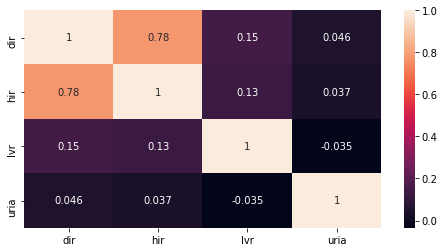

In [6]:
# Heatmap of correlation
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(df[['dir', 'hir', 'lvr', 'uria']].corr(), annot=True)
plt.show()

From the correlation coefficient table, we found that the 'hir' and 'dir' have very strong correlation. Therefore, in the feature selection part, it is wise to only keep one to avoid duplicate information. Other variables have less correlation coefficient. It means the other variables are considered to be independent, which fulfill the requirement of binomial logistic regression.

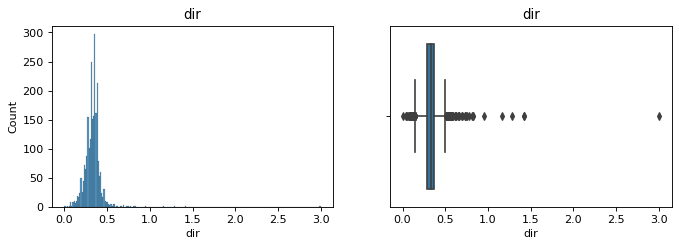

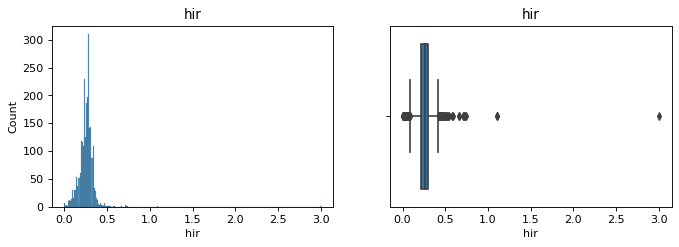

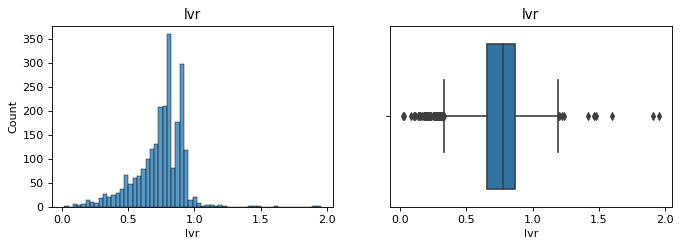

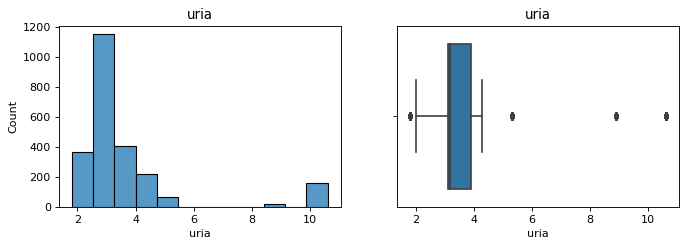

In [7]:
# Plot numeric data
for i in range(0,3):
    figure(figsize=(10, 3), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  df.iloc[:,i])
    plt.title(df.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

# plot uria (different binning)
figure(figsize=(10, 3), dpi=80)
plt.subplot(1,2,1)
sns.histplot(x = df.iloc[:,9], bins= 12)
plt.title(df.columns[9])
plt.subplot(1,2,2)
sns.boxplot(x = df.iloc[:,9])
plt.title(df.columns[9])
plt.show()

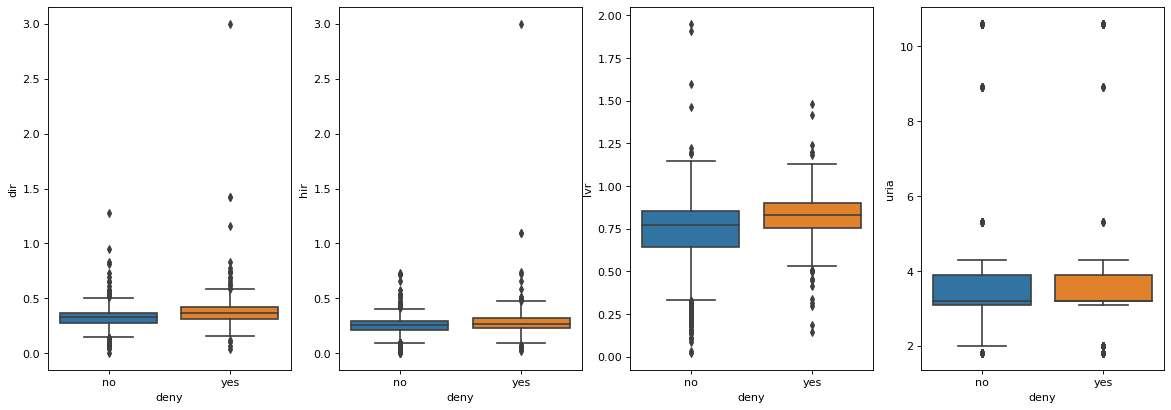

In [8]:
# Boxplot of continuous data separated based on 'deny'
figure(figsize=(18,6), dpi=80)
plt.subplot(1,4,1)
sns.boxplot(x = 'deny', y = 'dir', data = df)
plt.subplot(1,4,2)
sns.boxplot(x = 'deny', y = 'hir', data = df)
plt.subplot(1,4,3)
sns.boxplot(x = 'deny', y = 'lvr', data = df)
plt.subplot(1,4,4)
sns.boxplot(x = 'deny', y = 'uria', data = df)
plt.show()

Although the outliers make the boxplots slightly hard to interpret based on size, the boxplots for continuous data separated based on 'deny' shows denied mortgages have slightly higher debt to income ratios, housing expenses to income ratios, loan to property value ratios, and unemployment rates. These all make sense intuitively.

Text(0.5, 1.0, 'Debt Payments to Total Income Ratio vs. Housing Expenses to Income Ratio (dir vs hir)')

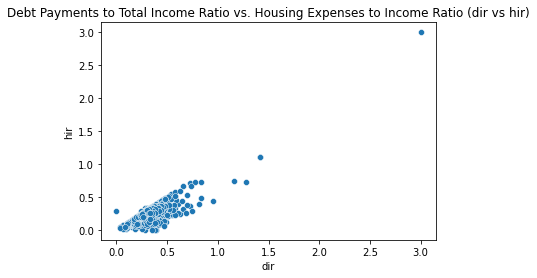

In [9]:
# Plot dir vs hir
figure(figsize=(6, 4))
sns.scatterplot(x = df['dir'], y = df['hir'])
plt.title('Debt Payments to Total Income Ratio vs. Housing Expenses to Income Ratio (dir vs hir)')

#### Categorical Variables

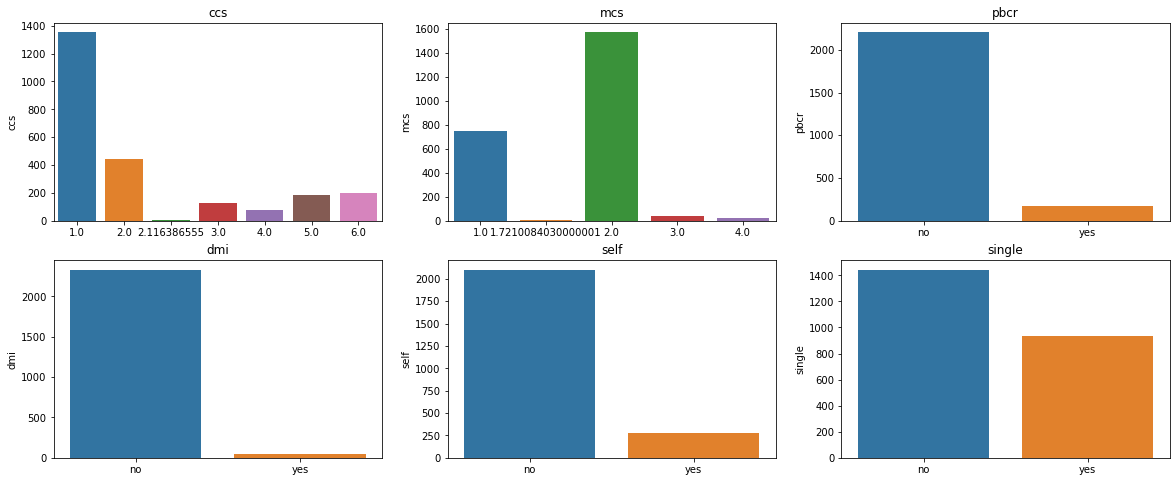

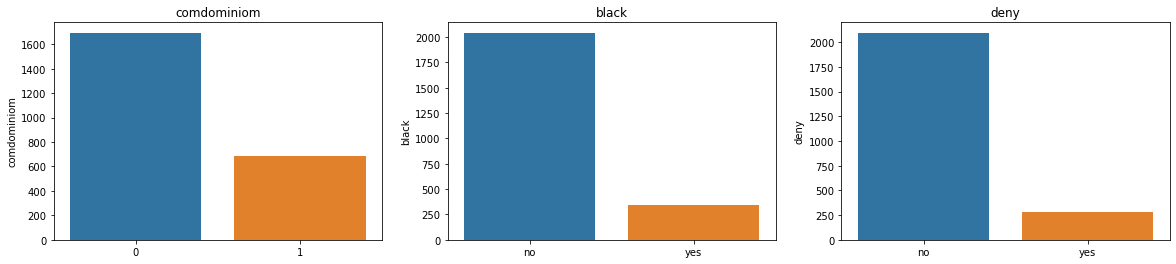

In [10]:
# Plot categorical data
figure(figsize=(20, 8))
for i in range(3,9):
    plt.subplot(2, 3, i-2)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
figure(figsize=(20, 4))
for i in range(10,13):
    
    plt.subplot(1, 3, i-9)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])

Each of the categorical attributes are shown above. Two ordinal catergorical values ccs and mcs has a irregular record with floating numbers, which will be dropped in the data preparation section. These two irregular data is in the same line as the null values. 

The other attributes are binary with observations for yes and no, except for condominium which is binary with 0 and 1. Each of the attributes have significantly higher observations for 'no', while it is unclear whether 0 or 1 signifies true or false with condominiom. We will assume 1 signifies true while 0 signifies false based on data science industry standard of binary as well as domain knowledge. It makes sense intuitively that most loans are not for condominiums, being that the proportion of condominium properties is a small subset of properties on the market.

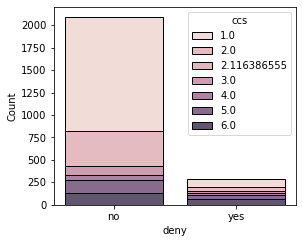

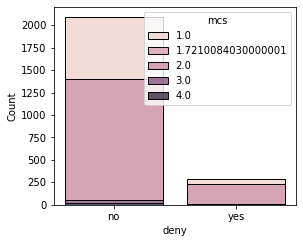

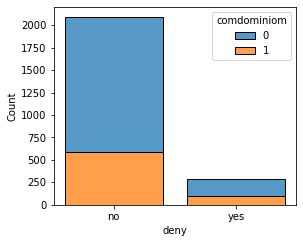

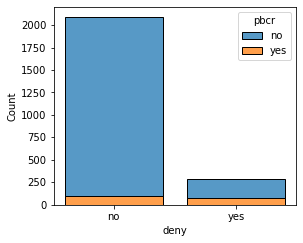

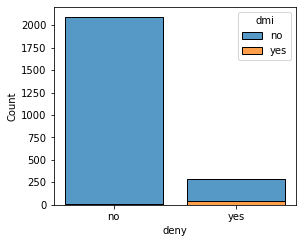

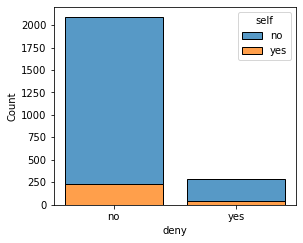

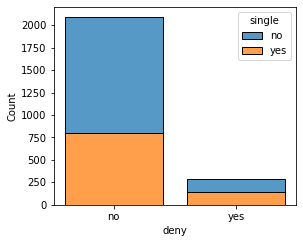

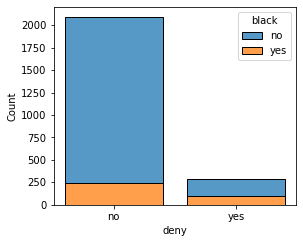

In [11]:
cat = ['ccs', 'mcs', 'comdominiom', 'pbcr', 'dmi', 'self', 'single', 'black']
count = 1
for i in cat:
    figure(figsize=(20, 8))
    plt.subplot(2, 4, count)
    sns.histplot(
      df,
      x='deny',
      hue= i,
      multiple='stack',
      shrink= 0.8)
    count = count + 1

Based on the EDA above, PBCR, DMI, SINGLE, and BLACK are all more likely to be denied a lone. Each of these categories' '1' values have a higher ratio of denied loans than '0'.

## 3. Data Preparation
### 3.1 Missing Value and Outliers
Refer back to the EDA section, the 2 Nan values, as well as the invalid values for ccs and mcs are found in 1 observation. Removing 1 observation from the dataset should make little difference to the distribution, as well as the machine learning algorithm. Also, the extreme special cases will be removed below. The outliers will be removed based on domain knowledge. 

Source:
https://www.savingforcollege.com/article/student-loan-101-what-is-debt-to-income-ratio

In [12]:
# delete missing values
df=df.dropna()

# remove the outliers
df=df.loc[(df['dir'] <= 1) & (df['hir'] <= 1) & (df['uria'] <= 100)]

### 3.2 Dealing with Categorical Variables
The categorical variables with yes/no values need to be changed to 0 and 1. 0 means no, while 1 means yes.

In [13]:
# Creating dummy variables for logistic regression
# Signify the dummy variables by the capital version of their original column name
df['PBCR'] = (df['pbcr'] == 'yes').astype(int) 
df['DMI'] = (df['dmi'] == 'yes').astype(int) 
df['SELF'] = (df['self'] == 'yes').astype(int)
df['SINGLE'] = (df['single'] == 'yes').astype(int) 
df['BLACK'] = (df['black'] == 'yes').astype(int) 
df['DENY'] = (df['deny'] == 'yes').astype(int)

# Dropping old columns with 'yes' and 'no' observations
df = df.drop('pbcr', axis=1)
df = df.drop('dmi', axis=1)
df = df.drop('self', axis=1)
df = df.drop('single', axis=1)
df = df.drop('black', axis=1)
df = df.drop('deny', axis=1)

# sanity check
df.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,PBCR,DMI,SELF,SINGLE,BLACK,DENY
0,0.221,0.221,0.800000,5.0,2.0,3.9,0,0,0,0,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,0,0,0,1,0,0
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,0,0,0,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,0,0,0,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,0,0,0,0,0,0


## 4. Prepped Data Review
After the data preparation, we will re-run the EDA according to the same code with section 2.

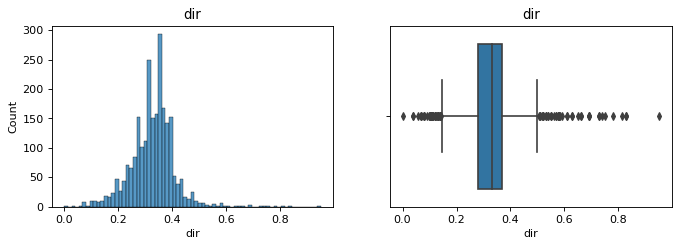

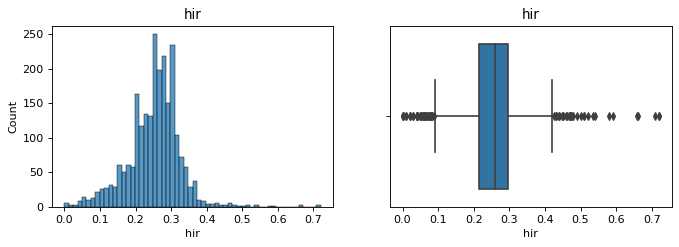

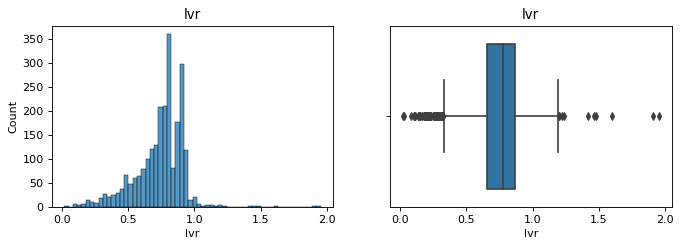

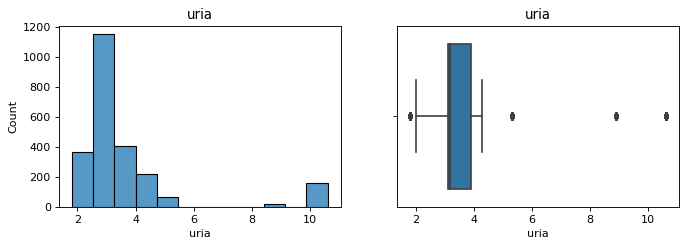

In [14]:
# Plot numeric data
for i in range(0,3):
    figure(figsize=(10, 3), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x=  df.iloc[:,i])
    plt.title(df.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df.iloc[:,i])
    plt.title(df.columns[i])
    plt.show()

# plot uria (different binning)
figure(figsize=(10, 3), dpi=80)
plt.subplot(1,2,1)
sns.histplot(x = df.iloc[:,5], bins= 12)
plt.title(df.columns[5])
plt.subplot(1,2,2)
sns.boxplot(x = df.iloc[:,5])
plt.title(df.columns[5])
plt.show()

The outliers of numeric variables are dropped.

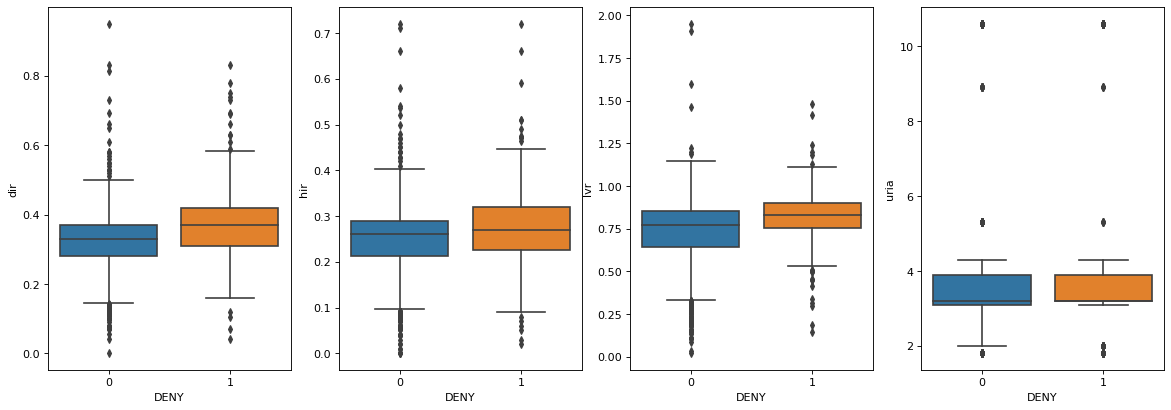

In [15]:
# Boxplot of continuous data separated based on 'deny'
figure(figsize=(18,6), dpi=80)
plt.subplot(1,4,1)
sns.boxplot(x = 'DENY', y = 'dir', data = df)
plt.subplot(1,4,2)
sns.boxplot(x = 'DENY', y = 'hir', data = df)
plt.subplot(1,4,3)
sns.boxplot(x = 'DENY', y = 'lvr', data = df)
plt.subplot(1,4,4)
sns.boxplot(x = 'DENY', y = 'uria', data = df)
plt.show()

Text(0.5, 1.0, 'Debt Payments to Total Income Ratio vs. Housing Expenses to Income Ratio (dir vs hir)')

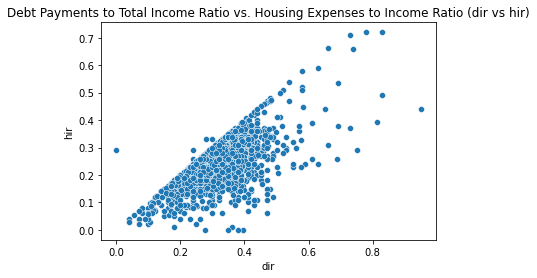

In [16]:
# Plot dir vs hir
figure(figsize=(6, 4))
sns.scatterplot(x = df['dir'], y = df['hir'])
plt.title('Debt Payments to Total Income Ratio vs. Housing Expenses to Income Ratio (dir vs hir)')

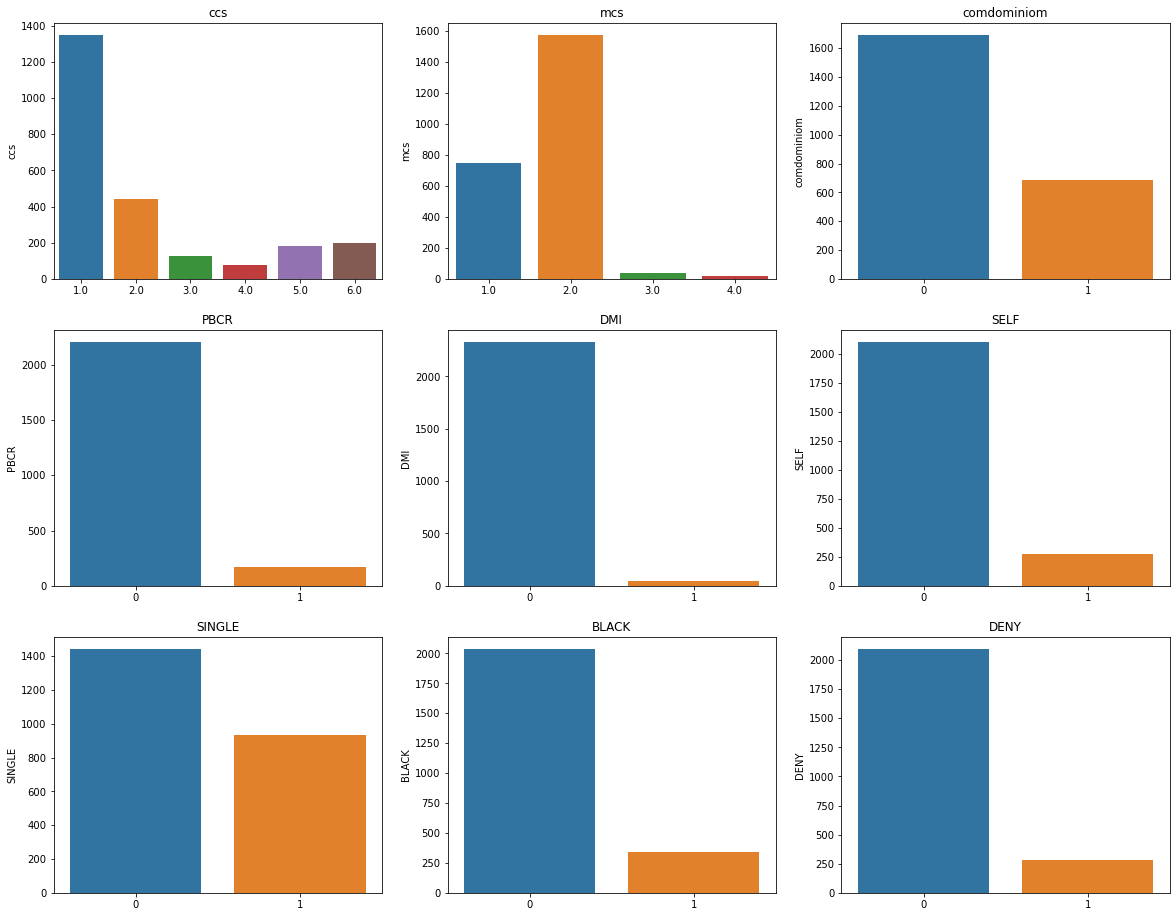

In [17]:
# Plot categorical data
cat = [3, 4, 6, 7, 8, 9, 10, 11, 12]
figure(figsize=(20, 16))
count = 1
for i in cat:
    plt.subplot(3, 3, count)
    sns.barplot(x = df.iloc[:,i].value_counts().index, y = df.iloc[:,i].value_counts())
    plt.title(df.columns[i])
    count += 1

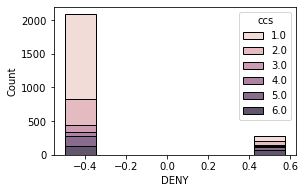

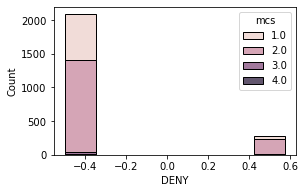

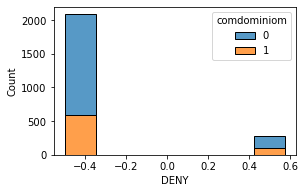

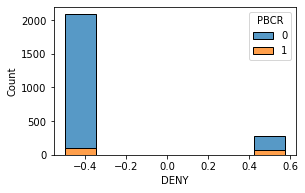

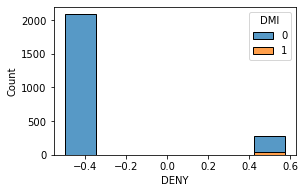

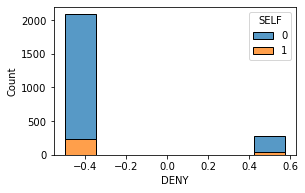

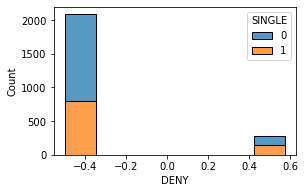

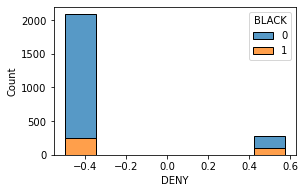

In [18]:
cat = ['ccs', 'mcs', 'comdominiom', 'PBCR', 'DMI', 'SELF', 'SINGLE', 'BLACK']
count = 1
for i in cat:
    figure(figsize=(20, 6))
    plt.subplot(2, 4, count)
    sns.histplot(
      df,
      x='DENY',
      hue= i,
      multiple='stack',
      shrink= 2)
    count = count + 1

The irregular value of ccs and mcs has been removed. The yes/no categorical data changed narrative to dummy variables 0 and 1.

## 5. KNN + SVM Modeling
In this section, 2 kinds of feature selection method will be used to select 2 groups of features for modelling. The feature selection methods include:
- 1. Backward Elimination
- 2. Random Forest

In this section, due to the imbalanced data of the original data set, we will apply Synthetic Minority Oversampling Technique (SMOTE) to deal with the original data set. The original data set will be split as training data set, testing data set, which is for future evaluation. The training data set will be used for cross-validation. As the SMOTE cannot be applied for the validation fold while doing cross-validation, the training set will be cross validated through a loop.

In [19]:
# set the explanatory variables and response variable
X = df[['dir','lvr','ccs','mcs','uria','comdominiom','PBCR','SELF','DMI','SINGLE','BLACK']]
y = df['DENY']


### 5.1 KNN Model Based on Backward Elimination Feature Selection

In [20]:
# apply code block for backward elimination feature selection
'''**********************************
Original code cited from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
*************************************'''
import statsmodels.api as sm
# Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    # sm requires that have an additional variable with a constant of one
    X_1 = sm.add_constant(X_1)
    # selection based on Logit
    model = sm.Logit(y,X_1).fit()
    # selects all as feature variables
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    # iterates and removes variables that are not a good fit
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.266754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.266760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.267324
         Iterations 7
['dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK']


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# define a vector containing the names of the attributes to use
X_BE = df[['dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK']]
y = df['DENY']

# split training and testing sets
X_BE_train, X_BE_test, y_BE_train, y_BE_test = train_test_split(X_BE, y, test_size=0.2)

# apply cross-validation on each fold of training set
kf = KFold(n_splits=5)
# creat a list for containg the score
acc=[]
pre=[]
recall=[]
f1=[]

# do cross validation on the training set
# cited code from https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE

for fold, (train_index, val_index) in enumerate(kf.split(X_BE_train), 1):
    X_BE_train_cv = X_BE_train.iloc[train_index]
    y_BE_train_cv = y_BE_train.iloc[train_index]  
    X_BE_val_cv = X_BE_train.iloc[val_index]
    y_BE_val_cv = y_BE_train.iloc[val_index]  
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_BE_train_cv, y_BE_train_cv)
    knn_BE = KNeighborsClassifier(n_neighbors=6) 
    knn_BE.fit(X_train_oversampled, y_train_oversampled )  
    y_pred_val = knn_BE.predict(X_BE_val_cv)
    # append score to each cross val
    acc.append(accuracy_score(y_BE_val_cv, y_pred_val))
    pre.append(precision_score(y_BE_val_cv, y_pred_val))
    recall.append(recall_score(y_BE_val_cv, y_pred_val))
    f1.append(f1_score(y_BE_val_cv, y_pred_val))

print(sum(acc)/len(acc))
print(sum(pre)/len(pre))
print(sum(recall)/len(recall))
print(sum(f1)/len(f1))

0.7836842105263158
0.28325482964524057
0.4375880377572364
0.34258670479005227


After empirical testing, the K value was selected as 6, for reaching a higher accuracy score.

### 5.2 SVM Model Based on Backward Elimination Feature Selection

In [22]:
# define a vector containing the names of the attributes to use
X_BE = df[['dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK']]
y = df['DENY']

# split training and testing sets
X_BE_train, X_BE_test, y_BE_train, y_BE_test = train_test_split(X_BE, y, test_size=0.2)

# apply cross-validation on each fold of training set
kf = KFold(n_splits=5)
# creat a list for containg the score
acc=[]
pre=[]
recall=[]
f1=[]

# do cross validation on the training set
# cited code from https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
for fold, (train_index, val_index) in enumerate(kf.split(X_BE_train), 1):
    X_BE_train_cv = X_BE_train.iloc[train_index]
    y_BE_train_cv = y_BE_train.iloc[train_index]  
    X_BE_val_cv = X_BE_train.iloc[val_index]
    y_BE_val_cv = y_BE_train.iloc[val_index]  
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_BE_train_cv, y_BE_train_cv)
    SVM_BE = SVC(kernel='linear')
    SVM_BE.fit(X_train_oversampled, y_train_oversampled)  
    y_pred_val = SVM_BE.predict(X_BE_val_cv)
    # append score to each cross val
    acc.append(accuracy_score(y_BE_val_cv, y_pred_val))
    pre.append(precision_score(y_BE_val_cv, y_pred_val))
    recall.append(recall_score(y_BE_val_cv, y_pred_val))
    f1.append(f1_score(y_BE_val_cv, y_pred_val))

print(sum(acc)/len(acc))
print(sum(pre)/len(pre))
print(sum(recall)/len(recall))
print(sum(f1)/len(f1))

0.7936842105263157
0.335762105372653
0.6681525643290349
0.44191713685124895


### 5.3 KNN Model Based on Random Forest Feature Selection

In [23]:
'''**********************************
Code was from https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
**************************************'''
# import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# split the training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

# apply the feature selection
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['dir', 'lvr', 'ccs', 'uria', 'DMI'], dtype='object')


In [24]:
# define a vector containing the names of the attributes to use
X_RF = df[['dir', 'lvr', 'ccs', 'uria', 'DMI']]
y = df['DENY']

X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y, test_size=0.2)

# apply cross-validation on each fold of training set
kf = KFold(n_splits=5)
# creat a list for containg the score
acc=[]
pre=[]
recall=[]
f1=[]

# do cross validation on the training set
# cited code from https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
for fold, (train_index, val_index) in enumerate(kf.split(X_RF_train), 1):
    X_RF_train_cv = X_RF_train.iloc[train_index]
    y_RF_train_cv = y_RF_train.iloc[train_index]  
    X_RF_val_cv = X_RF_train.iloc[val_index]
    y_RF_val_cv = y_RF_train.iloc[val_index]  
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_RF_train_cv, y_RF_train_cv)
    knn_RF = KNeighborsClassifier(n_neighbors=6) 
    knn_RF.fit(X_train_oversampled, y_train_oversampled )  
    y_pred_val = knn_RF.predict(X_RF_val_cv)
    # append score to each cross val
    acc.append(accuracy_score(y_RF_val_cv, y_pred_val))
    pre.append(precision_score(y_RF_val_cv, y_pred_val))
    recall.append(recall_score(y_RF_val_cv, y_pred_val))
    f1.append(f1_score(y_RF_val_cv, y_pred_val))

print(sum(acc)/len(acc))
print(sum(pre)/len(pre))
print(sum(recall)/len(recall))
print(sum(f1)/len(f1))

0.7821052631578947
0.2637567425542109
0.4539062628576695
0.33329319095051957


The same as 5.1 model, after empirical testing, the K value was selected as 6, for reaching a higher accuracy score.

### 5.4 SVM Model Based on Random Forest Feature Selection

In [25]:
# define a vector containing the names of the attributes to use
X_RF = df[['dir', 'lvr', 'ccs', 'uria', 'DMI']]
y = df['DENY']

X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(X_RF, y, test_size=0.2)

# do cross validation on the training set
# cited code from https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
for fold, (train_index, val_index) in enumerate(kf.split(X_RF_train), 1):
    X_RF_train_cv = X_RF_train.iloc[train_index]
    y_RF_train_cv = y_RF_train.iloc[train_index]  
    X_RF_val_cv = X_RF_train.iloc[val_index]
    y_RF_val_cv = y_RF_train.iloc[val_index]  
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_RF_train_cv, y_RF_train_cv)
    SVM_BE = SVC(kernel='linear')
    SVM_BE.fit(X_train_oversampled, y_train_oversampled )  
    y_pred_val = SVM_BE.predict(X_RF_val_cv)
    # append score to each cross val
    acc.append(accuracy_score(y_RF_val_cv, y_pred_val))
    pre.append(precision_score(y_RF_val_cv, y_pred_val))
    recall.append(recall_score(y_RF_val_cv, y_pred_val))
    f1.append(f1_score(y_RF_val_cv, y_pred_val))
    
print(sum(acc)/len(acc))
print(sum(pre)/len(pre))
print(sum(recall)/len(recall))
print(sum(f1)/len(f1))

0.7934210526315789
0.2937642520282318
0.5416141829330299
0.37881625989785317


## 6. Select Models
As the cased being denied is obviously less than the approved cases. The data set is considered to be imbalanced. Therefore, in section 5, we used 4 scores to evaluate the models including accuracy, precision, recall and F1 score. Due to the SMOTE applied on the training set, the transformed training set actually has a "half and half" 0s and 1s. The null error rate is 50%. Therefore, the 4 models all higher than the null error rate. Under the similar accuracy, we prefer the model to have higher F1 score and higher recall, which shows the weighted average of the precision and recall. 

Therefore, we consider the SVM model with linear kernel under feature selected by Backward Elimination method is the best candidate when modelling. The accuracy is almost 0.8, while the F1 score is the highest 0.42. We will use this model to see the performance on the testing set.

In [26]:
# define a vector containing the names of the attributes to use
X_BE = df[['dir', 'lvr', 'ccs', 'uria', 'PBCR', 'SELF', 'DMI', 'SINGLE', 'BLACK']]
y = df['DENY']

# split training and testing sets
X_BE_train, X_BE_test, y_BE_train, y_BE_test = train_test_split(X_BE, y, test_size=0.2)


# cited code from https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python
# fit the model
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_BE_train, y_BE_train)
SVM_BE = SVC(kernel='linear')
SVM_BE.fit(X_train_oversampled, y_train_oversampled)  
y_pred = SVM_BE.predict(X_BE_test)

print("Accuracy:", accuracy_score(y_BE_test, y_pred))
print("Precision:", precision_score(y_BE_test, y_pred))
print("Recall:", recall_score(y_BE_test, y_pred))
print("F1:", f1_score(y_BE_test, y_pred))

Accuracy: 0.8168421052631579
Precision: 0.3793103448275862
Recall: 0.7457627118644068
F1: 0.5028571428571429


The result shows similar accuracy, precision, recall and F1 score on the testing set with the average score of validation folds. It means that the oversampling is done correctly. As the binary logistic regression model in module 7 can also reach a high accuracy and high precision, most importantly, the binary logistic regression model is intuitive to show the direction of each independent variable, which is explainable than the distance-based model. Therefore, we would prefer the logistic regression model.

## 7. Conclusions
Through Backward Elimination selection, 9 features were selected for distance-based model generating. The prediction result can reach a fairly high accuracy and average F1 score. SMOTE was attempted to applied on the training data set to improve the modelling performance on imbalanced data. The similar scores on testing set and validation groups indicates the model will generalize well in production. However, for explainability reason, the binary logistic regression model is preferred. 

### References
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
https://stackoverflow.com/questions/55591063/how-to-perform-smote-with-cross-validation-in-sklearn-in-python<br>
https://beckernick.github.io/oversampling-modeling/<br>
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html